# LetsGrowMore

## Prediction using Decision Tree  Algorithm

### By Snehal Kokare

In this task, we have to create the Decision Tree classifier and visualize it graphically. 
The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.  

In [145]:
#importing required librarires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
#reading data

data = pd.read_csv('iris.csv')  

In [147]:
#viewing the first 5 observations in the data

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [148]:
#viewing the last 5 observations in the data

data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [149]:
#shape of the data

data.shape

(150, 6)

There 150 observations on 6 variables.

In [150]:
#viewing the columns of the dataset

data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [151]:
#to view the types of the columns

data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Species is a categorical variable.

In [152]:
#to check for missing values

data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no missing values.

In [153]:
#summary of data

data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Results:

1. There are total 150 observations in the dataset.
2. There are no missing values.

3. Average Sepal Length in cm = 5.843333
4. Average Sepal Width in cm = 3.054000

5. Average Petal Length in cm = 3.758667
6. Average Petal Width in cm = 1.198667

7. Maximum Sepal Length in cm = 7.900
8. Minimum Sepal Lenth in cm = 4.300

9. Maximum Sepal Width in cm = 4.400
10. Minimum Sepal Width in cm = 2.00

11. Maximum Petal Length in cm = 6.900
12. Minimum Petal Length in cm = 1.00

13. Maximum Petal Width in cm = 2.500
14. Minimum Petal Width in cm = 0.100

<AxesSubplot:>

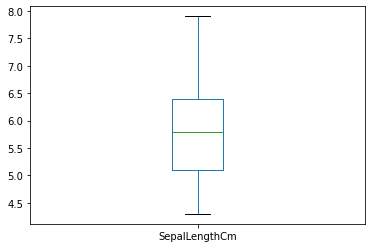

In [154]:
#Boxplot for 'SepalLengthCm'

data['SepalLengthCm'].plot.box()

<AxesSubplot:>

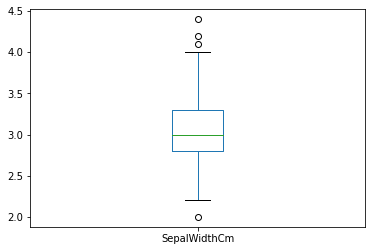

In [155]:
#Boxplot for 'SepalWidthCm'

data['SepalWidthCm'].plot.box()

<AxesSubplot:>

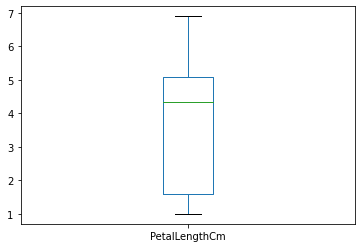

In [156]:
#Boxplot for 'PetalLengthCm'

data['PetalLengthCm'].plot.box()

<AxesSubplot:>

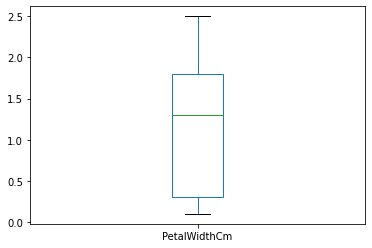

In [157]:
#Boxplot for 'PetalWidthCm'

data['PetalWidthCm'].plot.box()

There are no outliers in any column except in column SepalWidthCm.

Now, we have to treat the detected outliers. I will be using Flooring and Cappping method to do so.

In this quantile-based technique, we will do the flooring(eg. 25th percentile) for the lower values and capping(eg. for the 75th percentile) for the higher values.
These percentile values will be used for the quantile-based flooring and capping.
The codes given below will remove the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the 'SepalWidthCm' variable.

In [158]:
#treating outliers found in SepalWidthCm column using Flooring and Capping method

Q1 = data['SepalWidthCm'].quantile(0.25)
Q3 = data['SepalWidthCm'].quantile(0.75)

IQR = Q3 - Q1

whisker_width = 1.5

lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)

data['SepalWidthCm']=np.where(data['SepalWidthCm']>upper_whisker,upper_whisker,np.where(data['SepalWidthCm']<lower_whisker,lower_whisker,data['SepalWidthCm']))

<AxesSubplot:>

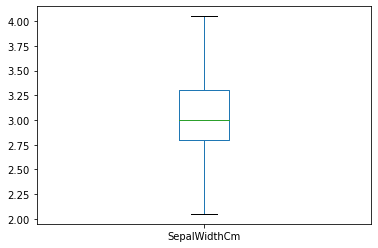

In [159]:
#Confirming that there are no more outliers in 'SepalWidthCm' using Boxplot

data['SepalWidthCm'].plot.box()

### We know that 'Species' is a categorical variable. So, now we have to deal with it.

In [160]:
data['Species'].replace('Iris-setosa', 0,inplace=True)
data['Species'].replace('Iris-versicolor', 1,inplace=True)
data['Species'].replace('Iris-virginica', 2,inplace=True)

In [161]:
#to view the first five rows 
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [162]:
#to view the last five rows
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [163]:
#dropping the Id column (as it is not required for prediction)

data1 = data.drop('Id',axis = 1)

In [164]:
data1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [165]:
# Separating independent and dependent variables

x = data1.drop(['Species'],axis=1)
y = data1['Species']

### Splitting data into train dataset and test dataset.

In [166]:
#importing required libraries

from sklearn.model_selection import train_test_split

In [167]:
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 101, stratify = y)

In [168]:
train_y.value_counts()/len(train_y)

2    0.339286
1    0.330357
0    0.330357
Name: Species, dtype: float64

In [169]:
test_y.value_counts()/len(test_y)

1    0.342105
0    0.342105
2    0.315789
Name: Species, dtype: float64

### DecisonTree Classifier

In [170]:
#importing required libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier()

In [171]:
#fitting data

decision_tree=clf.fit(x,y)
print(decision_tree)

DecisionTreeClassifier()


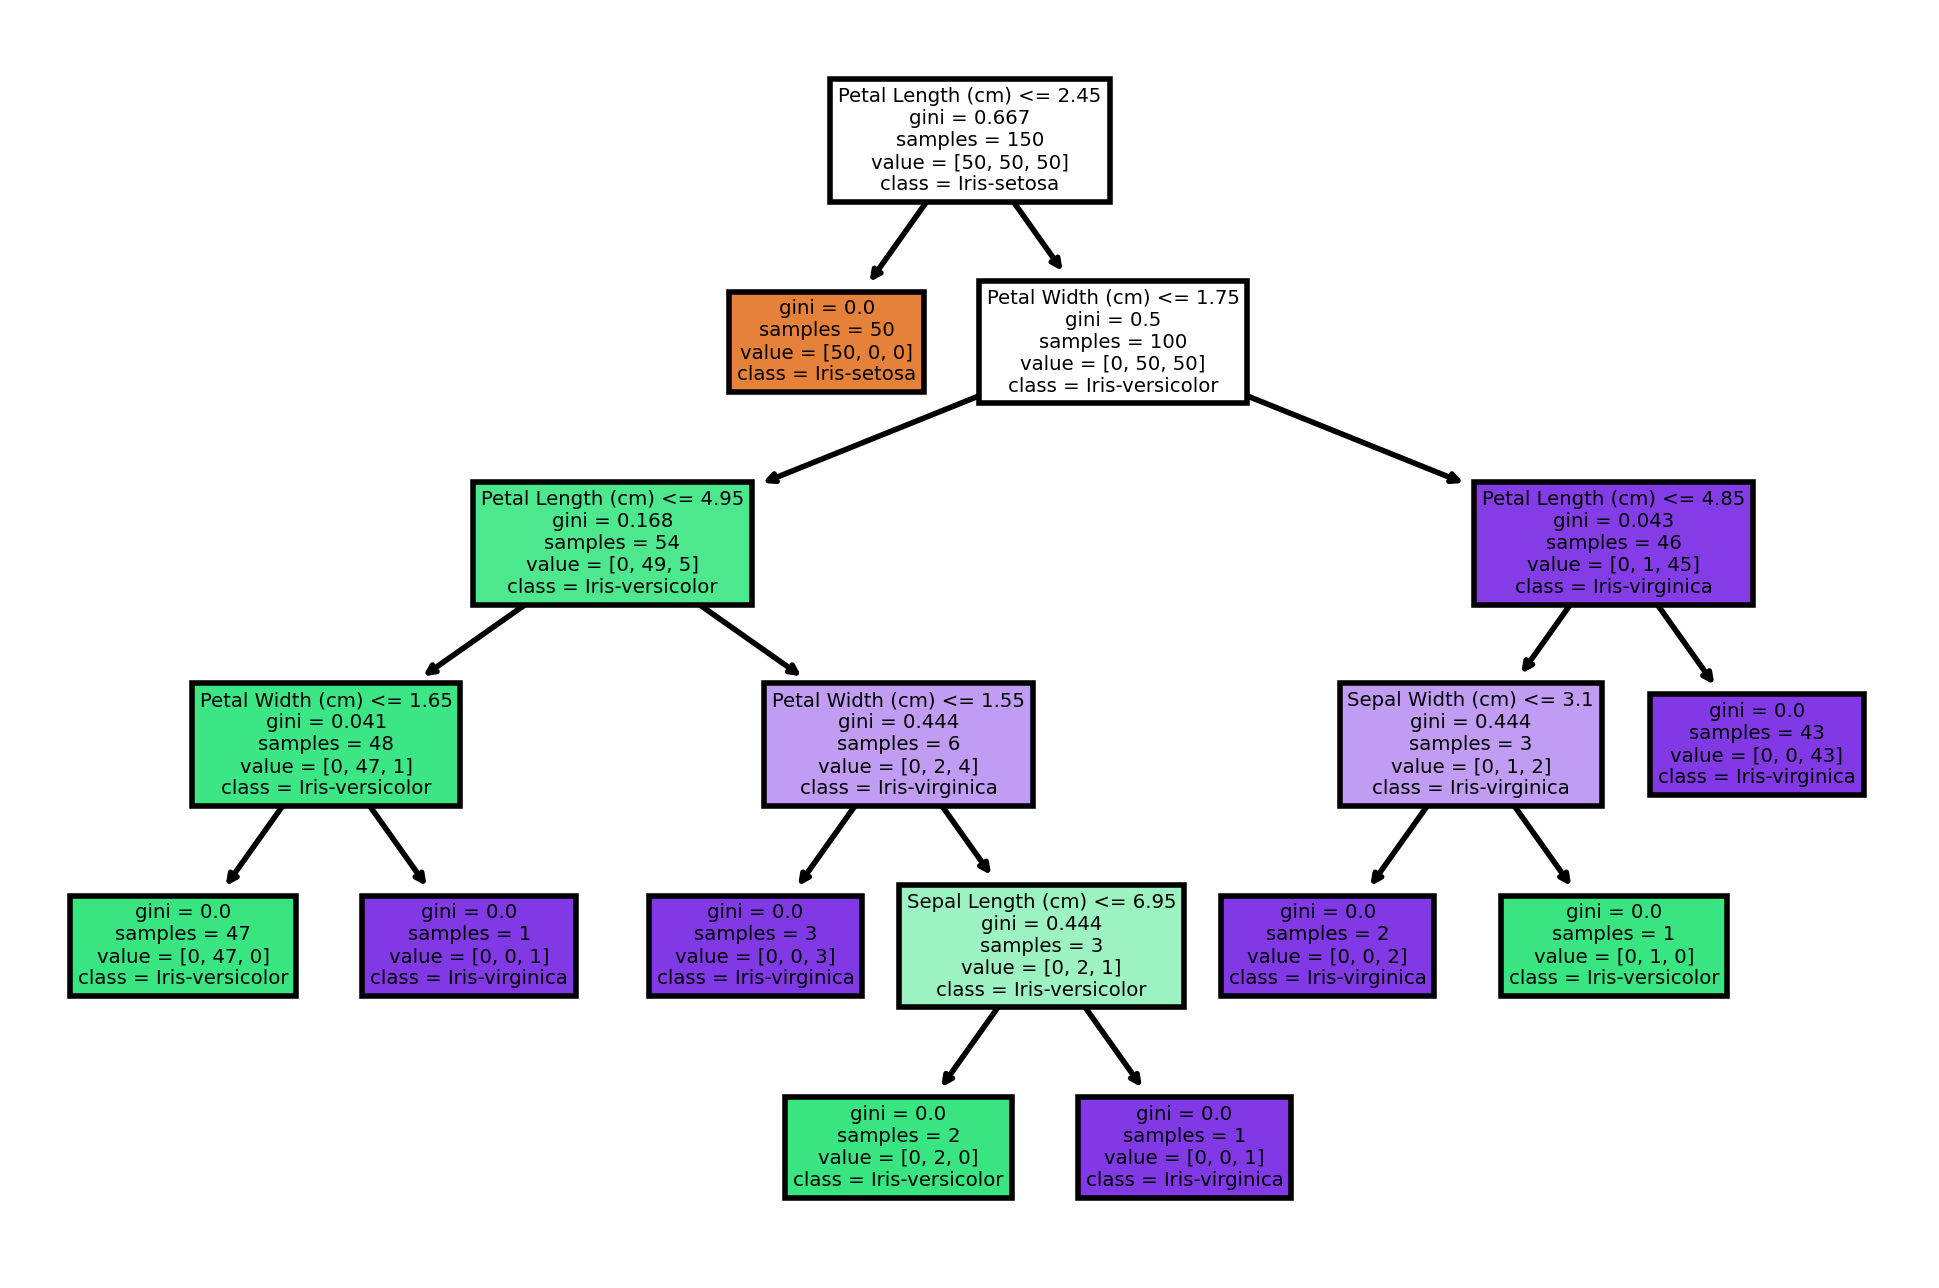

In [172]:
#loading the tree

features = ['Sepal Length (cm)','Sepal Width (cm)','Petal Length (cm)','Petal Width (cm)']
class_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, dpi = 400)

tree.plot_tree(dtree, feature_names = features, class_names = class_names, filled = True);

In [173]:
#fitting data on Training Datset

clf.fit(train_x,train_y)
clf_fit

DecisionTreeClassifier()

In [174]:
#checking for the score for Training Datset 

clf.score(train_x, train_y)

1.0

In [175]:
#checking for the score for Testing Datset 

clf.score(test_x, test_y)

0.9210526315789473

In [176]:
#making predictions for Training Dataset

clf.predict(train_x)

array([2, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2,
       0, 2, 2, 2, 0, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 0,
       2, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 1, 2, 1, 1,
       2, 0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 1, 2,
       2, 1], dtype=int64)

In [177]:
#making predictions for Testing Dataset

clf.predict(test_x)

array([1, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 2,
       2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 1], dtype=int64)

#### We find that the accuracy of the model is very good.

We got an accuracy around 92% on the test dataset.